In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# graphics in svg format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

# Read Data

In [2]:
# Read the data
train = pd.read_csv('U:\\projects\\data Science\\Energy Prediction Use Case\\data\\training_transformed.csv')
test = pd.read_csv('U:\\projects\\data Science\\Energy Prediction Use Case\\data\\testing_transformed.csv')

In [3]:
train.shape

(14803, 36)

In [4]:
train.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,rv1,rv2,NSM,WeekStatus,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,13.275433,13.275433,61200,1,1,0,0,0,0,0
1,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,18.606195,18.606195,61800,1,1,0,0,0,0,0
2,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,28.642668,28.642668,62400,1,1,0,0,0,0,0
3,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,10.084097,10.084097,63600,1,1,0,0,0,0,0
4,50,40,19.89,46.026667,19.2,44.500000,19.79,44.933333,18.890000,45.730000,...,44.919484,44.919484,64200,1,1,0,0,0,0,0


In [5]:
test.shape

(4932, 36)

In [6]:
test.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,rv1,rv2,NSM,WeekStatus,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,50,40,19.890000,46.066667,19.200000,44.590000,19.79,45.000000,18.89,45.723333,...,45.410389,45.410389,63000,1,1,0,0,0,0,0
1,60,50,19.890000,45.766667,19.200000,44.500000,19.79,44.900000,18.89,45.790000,...,47.233763,47.233763,64800,1,1,0,0,0,0,0
2,230,70,19.926667,45.863333,19.356667,44.400000,19.79,44.900000,18.89,46.430000,...,10.298729,10.298729,67200,1,1,0,0,0,0,0
3,580,60,20.066667,46.396667,19.426667,44.400000,19.79,44.826667,19.00,46.430000,...,8.827838,8.827838,67800,1,1,0,0,0,0,0
4,100,10,20.566667,53.893333,20.033333,46.756667,20.10,48.466667,19.00,48.490000,...,24.884962,24.884962,70200,1,1,0,0,0,0,0


In [7]:
train.columns

Index(['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2', 'NSM', 'WeekStatus', 'Monday', 'Saturday',
       'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

## Build Models

In [8]:
# Assign X & y for both training/test set

X_train = train[['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'NSM', 'WeekStatus', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']]
y_train = train[['Appliances']]

X_test = test[['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'NSM', 'WeekStatus', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']]
y_test = test[['Appliances']]

In [9]:
# Enable printing multiple outputs (if any) for each cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # default is last_exp

### Decision Tree

In [10]:
# Fitting Decision Tree Regression to the Training set
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Train model
DTModel = DecisionTreeRegressor(criterion = 'mse', random_state = 123)
DTModel.fit(X_train, y_train)

# Predicting the Test set results
y_pred = DTModel.predict(X_test)

# Evaluating the results
print('R**2 score, the coefficient of determination is: {}'.format(r2_score(y_pred, y_test)))
print('Mean Absolute Error:', mean_absolute_error(y_pred, y_test))  
print('Mean Squared Error:', mean_squared_error(y_pred, y_test))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_pred, y_test)))

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=123, splitter='best')

R**2 score, the coefficient of determination is: 0.1558176394125127
Mean Absolute Error: 38.724655312246554
Mean Squared Error: 8445.316301703164
Root Mean Squared Error: 91.89840206283874


#### Plot feature importances

In [11]:
results = pd.DataFrame(index=X_train.columns, data={'importance':DTModel.feature_importances_})
print('Feature importances:\n{}'.format(results))

Feature importances:
             importance
lights         0.028396
T1             0.017665
RH_1           0.027617
T2             0.026731
RH_2           0.032467
T3             0.051427
RH_3           0.061000
T4             0.031337
RH_4           0.020718
T5             0.031355
RH_5           0.038707
T6             0.038252
RH_6           0.022638
T7             0.031272
RH_7           0.019456
T8             0.033827
RH_8           0.023253
T9             0.027268
RH_9           0.028719
T_out          0.032279
Press_mm_hg    0.043307
RH_out         0.025742
Windspeed      0.028947
Visibility     0.020086
Tdewpoint      0.027207
rv1            0.016847
rv2            0.011242
NSM            0.180611
WeekStatus     0.002183
Monday         0.008399
Saturday       0.004255
Sunday         0.001089
Thursday       0.000838
Tuesday        0.000776
Wednesday      0.004086


Text(0.5, 1.0, 'Normalized Feature Importances')

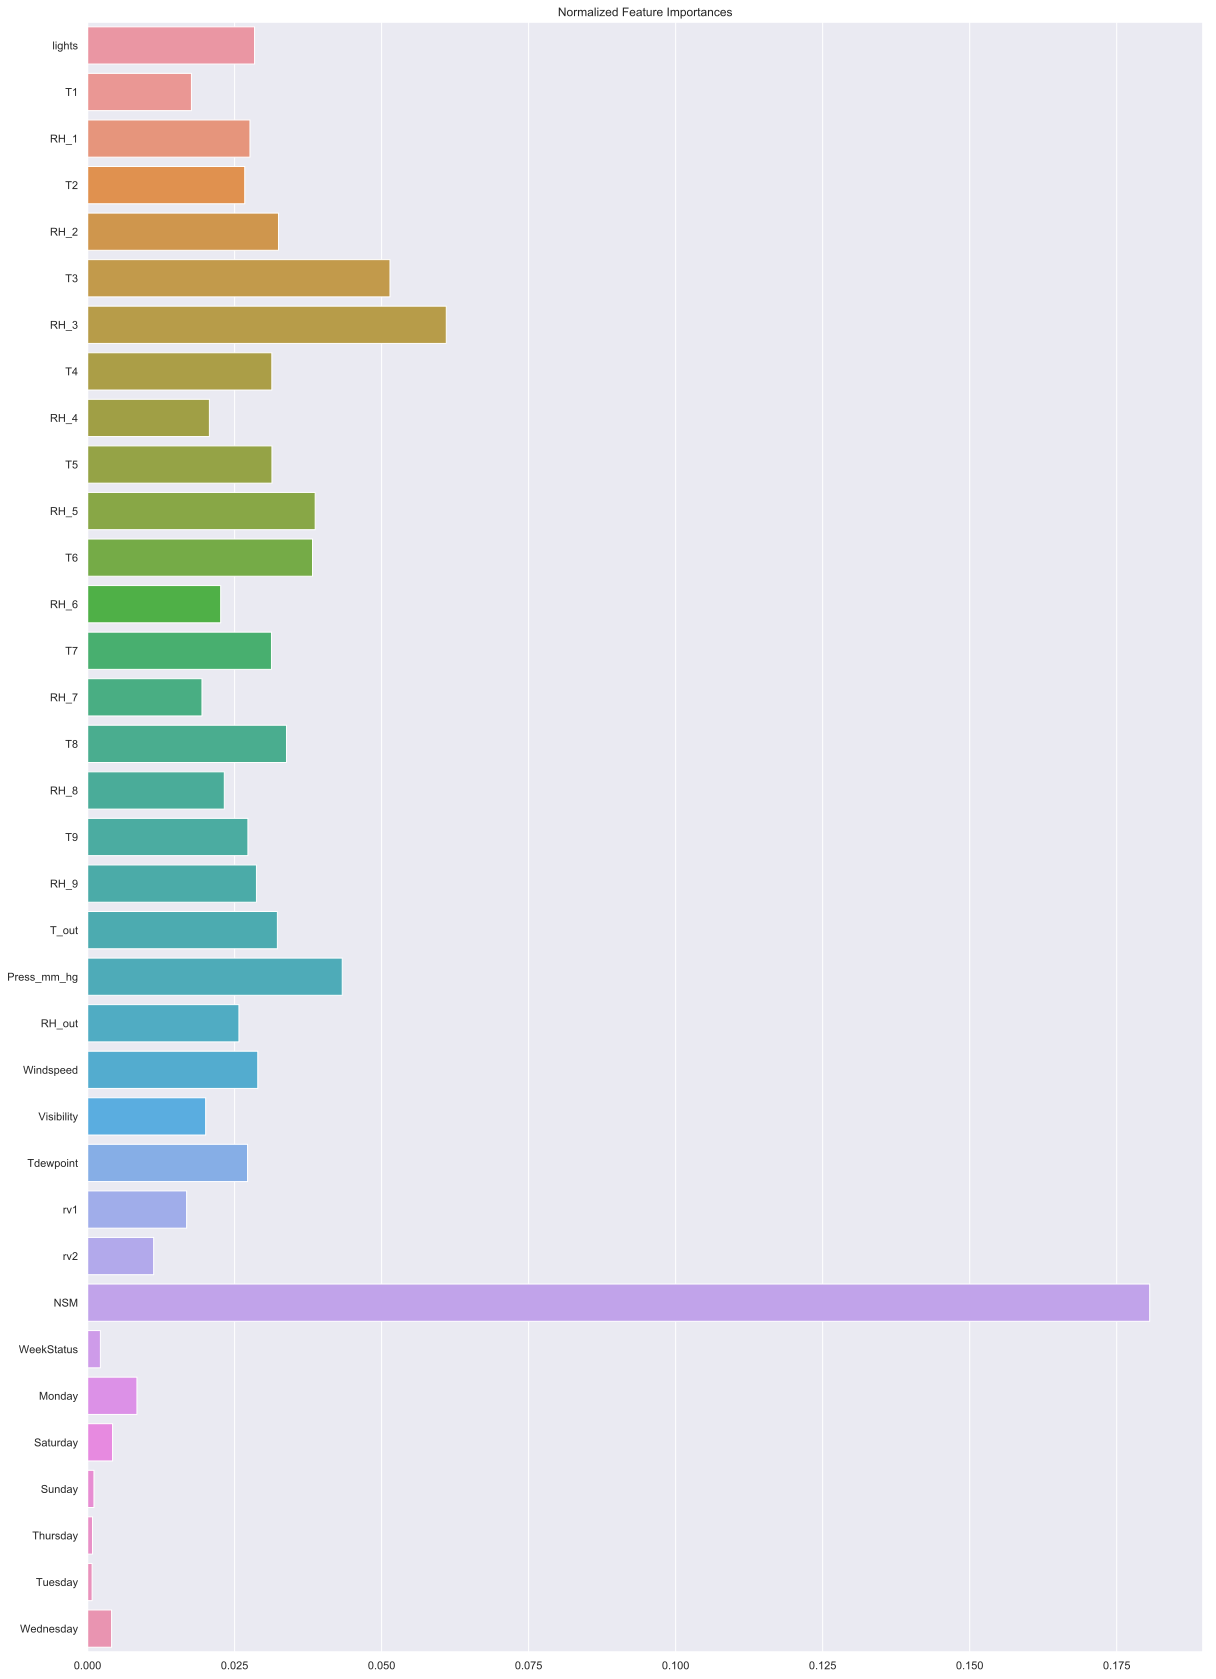

In [12]:
# Plot feature importances
plt.rcParams['figure.figsize'] = 20,30
plt.title('Normalized Feature Importances')
sns.barplot(y=X_train.columns, x=DTModel.feature_importances_)
plt.show()
#NSM is the MOST IMPORTANT FEATURE

In [ ]:
# Visualizing the tree
from io import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

names = X_train.columns
dot_data = StringIO()
export_graphviz(DTModel, out_file=dot_data,  feature_names=names, filled=True,
                rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

This is a bit hard to read due to the size of the tree produced with depth 4. You'll make other trees with varying depths. To make it easier to visualize decision tree models, you can embed the code for producing the diagram within a function.

In [ ]:
def visualize_decision_tree(tree, filled = True, rounded =T rue,
                            special_characters=True, **kwargs):
    '''Produces Image (for display in notebook) from decision tree model
    Input:
    tree: (trained) sklearn DecisionTreeRegressor or DecisionTreeClassifier
    filled: (default True) whether to fill boxes
    rounded: (default True) whether to round corners of boxes
    special_characters: (default True) whether to permit special characters in labels
    **kwargs: other optional keyword arguments as accepted by 
              sklearn.tree.export_graphviz
    Output: returns IPython.display.Image object
    '''
    dot_data = StringIO()
    export_graphviz(tree, out_file=dot_data, filled=filled,
                    rounded=rounded, special_characters=special_characters,
                    **kwargs)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    return Image(graph.create_png())

Now you can instantiate new trees with different depths and easily produce flowcharts

In [ ]:
tree2 = DecisionTreeRegressor(max_depth = 2, random_state=24)
tree2.fit(X_train, y_train)
visualize_decision_tree(tree2, feature_names=X_train.columns)

### Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression

# Train model
LRModel = LogisticRegression().fit(X_train, y_train)

# Predicting the Test set results
y_pred = LRModel.predict(X_test)

# Evaluating the results
print('R**2 score, the coefficient of determination is: {}'.format(r2_score(y_pred, y_test)))
print('Mean Absolute Error:', mean_absolute_error(y_pred, y_test))  
print('Mean Squared Error:', mean_squared_error(y_pred, y_test))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_pred, y_test)))

C:\Users\T2211377\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\T2211377\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\T2211377\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


R**2 score, the coefficient of determination is: -8.74769893283006
Mean Absolute Error: 48.767234387672346
Mean Squared Error: 12200.851581508516
Root Mean Squared Error: 110.45746503296424


### Support Vector Regression (SVR)

Based on input relationship with output (target) variable, choose the kernel = linear or non-linear (polynomial/gaussian) i.e. 'rbf'

In [16]:
# SVR needs scaled input

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [17]:
from sklearn.svm import SVR

# Train model
SVRModel = SVR(kernel='rbf').fit(X_train_sc, y_train)
 
# Predicting the Test set results
y_pred = SVRModel.predict(X_test_sc)

# Evaluating the results
print('R**2 score, the coefficient of determination is: {}'.format(r2_score(y_pred, y_test)))
print('Mean Absolute Error:', mean_absolute_error(y_pred, y_test))  
print('Mean Squared Error:', mean_squared_error(y_pred, y_test))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_pred, y_test)))

C:\Users\T2211377\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R**2 score, the coefficient of determination is: -34.993993180982706
Mean Absolute Error: 42.02188029788092
Mean Squared Error: 10115.684094300956
Root Mean Squared Error: 100.57675722701023


### Simple Linear Regression

Simple Linear regression works with single input. So I will pick most correlated/important feature as input 'NSM'.

In [18]:
# training set
X_train_sl = X_train['NSM'].values.reshape(-1,1)
y_train_sl = y_train['Appliances'].values.reshape(-1,1)

# test set
X_test_sl = X_test['NSM'].values.reshape(-1,1)
y_test_sl = y_test['Appliances'].values.reshape(-1,1)

In [19]:
from sklearn.linear_model import LinearRegression

# Train model
LRegressor = LinearRegression(fit_intercept=True)
LRegressor.fit(X_train_sl, y_train_sl)

# Predicting the Test set results
y_pred = LRegressor.predict(X_test_sl)

# Evaluating the results
print('R**2 score, the coefficient of determination is: {}'.format(r2_score(y_pred, y_test_sl)))
print('Mean Absolute Error:', mean_absolute_error(y_pred, y_test_sl))  
print('Mean Squared Error:', mean_squared_error(y_pred, y_test_sl))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_pred, y_test_sl)))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

R**2 score, the coefficient of determination is: -19.070511166229156
Mean Absolute Error: 55.07507757242332
Mean Squared Error: 9824.38357032297
Root Mean Squared Error: 99.11802848282935


In [20]:
# Priting the Slope and The Intercept

print("Model intercept:", LRegressor.intercept_)
print("Model slope:    ", LRegressor.coef_[0])

Model intercept: [59.74354436]
Model slope:     [0.00089024]


In [28]:
# Build data frame to compare actual vs predicted 
y_test_list = y_test_sl.tolist() # convert numpy array to python list
y_pred_list = y_pred.tolist() 
df = pd.DataFrame({'Actual': y_test_list, 'Predicted': y_pred_list})
df.head(10)

,Actual,Predicted
0,[50],[115.82840413647303]
1,[60],[117.43082870150441]
2,[230],[119.56739478821291]
3,[580],[120.10153630989004]
4,[100],[122.23810239659855]
5,[70],[123.3063854399528]
6,[190],[125.44295152666132]
7,[110],[125.97709304833845]
8,[100],[128.6478006567241]
9,[60],[132.92093283014108]


In [29]:
# Now let's plot the comparison of Actual and Predicted values
df.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

TypeError: no numeric data to plot

### Multiple Linear Regression

In [31]:
# Train model
MltRegressor = LinearRegression()
MltRegressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = MltRegressor.predict(X_test)

# Evaluating the results
print('R**2 score, the coefficient of determination is: {}'.format(r2_score(y_pred, y_test)))
print('Mean Absolute Error:', mean_absolute_error(y_pred, y_test))  
print('Mean Squared Error:', mean_squared_error(y_pred, y_test))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_pred, y_test)))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

R**2 score, the coefficient of determination is: -3.645929350537556
Mean Absolute Error: 51.984929609385105
Mean Squared Error: 8681.847902503478
Root Mean Squared Error: 93.17643426587797


In [37]:
# To see what coefficients our regression model has chosen, execute the following script:
coeff_df = pd.DataFrame(MltRegressor.coef_.T, index=X_train.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
lights,1.8555
T1,-5.9185
RH_1,14.5133
T2,-17.8954
RH_2,-13.8399
T3,26.3731
RH_3,6.2867
T4,0.9339
RH_4,-0.4809
T5,-1.4709


### Ridge Regression

Ridge regression is an extension of linear regression where the loss function is modified to minimize the complexity of the model measured as the sum squared value of the coefficient values (also called the L2-norm). You can construct a ridge regression model by using the Ridge class.

In [43]:
# Ridge Regression

# ‘explained_variance’ -- > metrics.explained_variance_score
# ‘max_error’ -- > metrics.max_error
# ‘neg_mean_absolute_error’ -- > metrics.mean_absolute_error
# ‘neg_mean_squared_error’ -- > metrics.mean_squared_error
# ‘neg_root_mean_squared_error’ -- > metrics.mean_squared_error
# ‘neg_mean_squared_log_error’ -- > metrics.mean_squared_log_error
# ‘neg_median_absolute_error’ -- > metrics.median_absolute_error
# ‘r2’ -- > metrics.r2_score
# ‘neg_mean_poisson_deviance’ -- > metrics.mean_poisson_deviance
# ‘neg_mean_gamma_deviance’ -- > metrics.mean_gamma_deviance


from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge

kfold = KFold(n_splits=10, random_state=7)
Rmodel = Ridge()
scoring = 'r2'
results = cross_val_score(Rmodel, X_train, y_train, cv=kfold, scoring=scoring)
print(results.mean())

0.1217304906396433


### LASSO Regression

The Least Absolute Shrinkage and Selection Operator (or LASSO for short) is a modification of linear regression, like ridge regression, where the loss function is modified to minimize the
complexity of the model measured as the sum absolute value of the coefficient values (also called the L1-norm). You can construct a LASSO model by using the Lasso class3.

In [44]:
# Lasso Regression


from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso

kfold = KFold(n_splits=10, random_state=7)
Lmodel = Lasso()
scoring = 'r2'
results = cross_val_score(Lmodel, X_train, y_train, cv=kfold, scoring=scoring)
print(results.mean())

0.12080786347968564


### ElasticNet Regression

ElasticNet is a form of regularization regression that combines the properties of both Ridge Regression and LASSO regression. It seeks to minimize the complexity of the regression model
(magnitude and number of regression coefficients) by penalizing the model using both the L2-norm (sum squared coefficient values) and the L1-norm (sum absolute coefficient values). You can construct an ElasticNet model using the ElasticNet class.

In [45]:
# ElasticNet Regression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import ElasticNet

kfold = KFold(n_splits=10, random_state=7)
Emodel = ElasticNet()
scoring = 'r2'
results = cross_val_score(Emodel, X_train, y_train, cv=kfold, scoring=scoring)
print(results.mean())

0.1108059971155038
